## Imports

In [407]:
import pandas as pd
from icecream import ic

## Load Dataset

In [408]:
source_filepath = '../datasets/oecd-population.csv'
target_filepath = '../plots'
oecd_pop_df = pd.read_csv(source_filepath)

In [409]:
oecd_pop_df.shape

(92907, 11)

In [410]:
oecd_pop_df['Age'].unique()

array(['2 years', '3 years', '4 years', '5 years', '6 years', '7 years',
       '8 years', '9 years', '10 years', '11 years', '12 years',
       '13 years', '14 years', '15 years', '16 years', '17 years',
       '18 years', '19 years', '20 years', '21 years', '22 years',
       '23 years', '24 years', '25 years', '26 years', '27 years',
       '28 years', '29 years', '30 years', '31 years', '32 years',
       '33 years', '34 years', '35 years', '36 years', '37 years',
       '38 years', '39 years', '40 years', '41 years', '42 years',
       '43 years', '44 years', '45 years', '46 years', '47 years',
       '48 years', '49 years', 'From 50 to 54 years',
       'From 55 to 59 years', 'From 60 to 64 years', '65 years or over',
       '1 year', 'From 10 to 14 years', '0 years', 'Total', 'Unknown'],
      dtype=object)

In [411]:
oecd_pop_df.head()

,COUNTRY,Country,SEX,Gender,AGE,Age,YEAR,Year,Value,Flag Codes,Flags
0,AUS,Australia,F,Female,Y2,2 years,2000,2000,122824.0,NaN,NaN
1,AUS,Australia,F,Female,Y2,2 years,2005,2005,123149.0,NaN,NaN
2,AUS,Australia,F,Female,Y2,2 years,2010,2010,142144.0,NaN,NaN
3,AUS,Australia,F,Female,Y2,2 years,2011,2011,142664.0,NaN,NaN
4,AUS,Australia,F,Female,Y2,2 years,2012,2012,145990.0,NaN,NaN


## Data Preprocessing

In [412]:
cols_of_interest = ['Country', 'Gender', 'Age', 'Year', 'Value']
oecd_pop_df = oecd_pop_df[cols_of_interest]
oecd_pop_df.head()

,Country,Gender,Age,Year,Value
0,Australia,Female,2 years,2000,122824.0
1,Australia,Female,2 years,2005,123149.0
2,Australia,Female,2 years,2010,142144.0
3,Australia,Female,2 years,2011,142664.0
4,Australia,Female,2 years,2012,145990.0


In [413]:
oecd_pop_df['Year'].unique()

array([2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [414]:
country = 'Australia'
country_pop = oecd_pop_df.query('Country == @country').drop(['Country'], axis=1)
country_pop.head()

,Gender,Age,Year,Value
0,Female,2 years,2000,122824.0
1,Female,2 years,2005,123149.0
2,Female,2 years,2010,142144.0
3,Female,2 years,2011,142664.0
4,Female,2 years,2012,145990.0


In [415]:
# gender_enabled = True
gender = 'Total'
country_tot_pop = country_pop.query('Gender == @gender').drop('Gender', axis=1)
country_tot_pop.head()

,Age,Year,Value
57073,36 years,2000,297614.0
57074,36 years,2005,299111.0
57075,36 years,2010,309717.0
57076,36 years,2011,305275.0
57077,36 years,2012,304389.0


In [451]:
def create_age_groups(group_age_by):
    reference_age = 65
    ages_dict = dict()

    get_age_label = lambda *args: \
        f'{args[0]} years' if args[0] == args[1] else f'{age-group_age_by} years to {age-1} years'

    age = reference_age
    if age >= 65: 
        ages_label = ages_inds = '65 years or over'
        ages_dict[ages_inds] = ages_label
        ic(f'{ages_inds}: {ages_label}')
    while (age > 50):
        ages_label = get_age_label(age-group_age_by, age-1)
        ages_inds = []
        for init_age in range(age-group_age_by, age, 5):
            if init_age+5 > 50:
                ages_inds.insert(0, f'From {init_age} to {init_age+5-1} years')
            else:
                ages_inds.extend([f'{i} years' for i in range(init_age, init_age+5)])
        ages_dict[tuple(ages_inds)] = ages_label
        age -= group_age_by
        ic(f'{ages_inds}: {ages_label}')
    while(age > 0 and age >= group_age_by):
        ages_inds = [f'{i} years' for i in range(age-group_age_by, age)]
        ages_label = f'{get_age_label(age-group_age_by, age-1)}'
        ages_dict[tuple(ages_inds)] = ages_label
        ic(f'{ages_inds}: {ages_label}')
        age -= group_age_by
    if age > 0:
        ages_label = f'below {age} years'
        ages_inds = [f'{i} years' for i in range(0, age)]
        ages_dict[tuple(ages_inds)] = ages_label
        ic(f'{ages_inds}: {ages_label}')

    return ages_dict

In [452]:
def replace_column_names(col_name, group_age_by):
    ref_dict = create_age_groups(group_age_by)
    for key, label in ref_dict.items():
        if col_name in key:
            return label

In [462]:
import re
country_pop_procced_df = country_tot_pop.copy()
group_age_by=10
age_groups = list(create_age_groups(group_age_by).values())
country_pop_procced_df['Age'] = country_pop_procced_df['Age'].apply(replace_column_names, group_age_by=group_age_by)
country_pop_procced_df = country_pop_procced_df.loc[country_pop_procced_df['Age'].isin(age_groups)]

country_pop_procced_df.sort_values(by='Age')['Age'].unique()


array(['15 years to 24 years', '25 years to 34 years',
       '35 years to 44 years', '45 years to 54 years',
       '5 years to 14 years', '55 years to 64 years', '65 years or over',
       'below 5 years'], dtype=object)

In [470]:
country_pop_procced_df = country_pop_procced_df.groupby(['Year', 'Age'])['Value'].sum()
country_pop_procced_df

Year  Age                 
2000  15 years to 24 years    2595640.0
      25 years to 34 years    2855634.0
      35 years to 44 years    2936641.0
      45 years to 54 years    2583189.0
      5 years to 14 years     2403200.0
                                ...    
2021  45 years to 54 years    3261589.0
      5 years to 14 years     2919664.0
      55 years to 64 years    3015532.0
      65 years or over        4634781.0
      below 5 years           1214795.0
Name: Value, Length: 112, dtype: float64

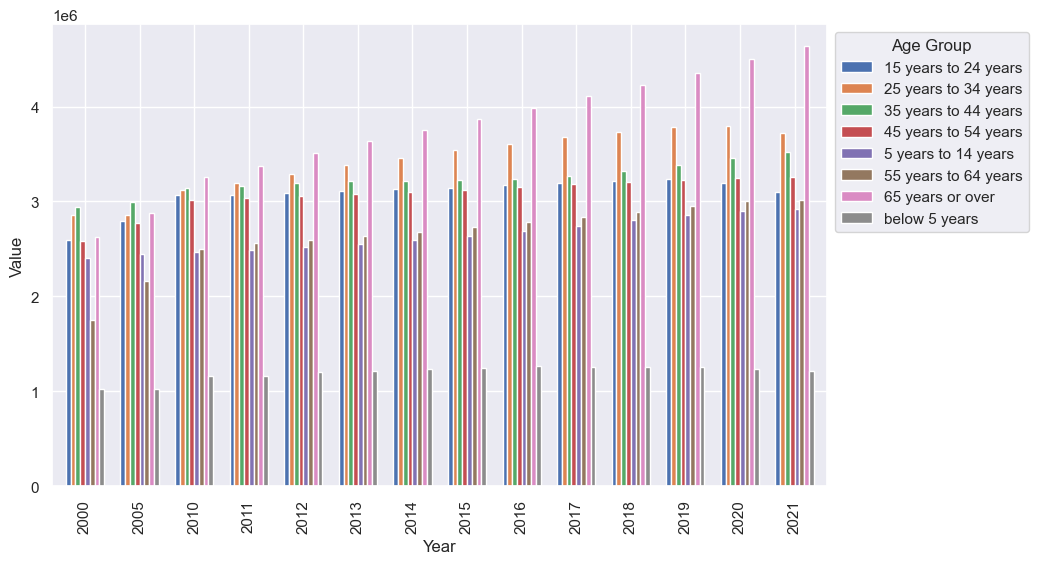

In [476]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

ax = country_pop_procced_df.unstack().plot(kind='bar', width=0.7, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')

# plt.yticks([1e6, 2e6, 3e6, 4e6, 7e6, 8e6, 9e6, 10e6], [1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000])

# Adding legend
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()